In [1]:
import os
import time
import sys
import mlrose_hiive as mlrose
from random import randint
from random import seed
import matplotlib.pyplot as plt
import numpy as np

os.chdir(r'C:/Users/xpj/Desktop/OMSCS/CS7641/HW/HW2')

In [2]:
#set problem size
#change max_iteration
#assess time

seed(2022)

# Initialize fitness function object using coords_list
fitness = mlrose.ContinuousPeaks(t_pct = 0.1)
problem = mlrose.DiscreteOpt(length = 100, fitness_fn = fitness, maximize = True, max_val = 2)
problem.set_mimic_fast_mode(True)

#MAX IS BEST!

In [3]:
#fitness based on parameters
array3 = "fit_array3"
meth = ["_rhc","_ga","_sa","_mimic"]

for m in meth:
    globals()[array3 + m]=[]

#RHC
restarts = range(0,20)
for r in restarts:
    _, best_fitness_rhc, _ = mlrose.random_hill_climb(problem, max_attempts = 10, 
                                                    max_iters = 500, restarts = r )
    fit_array3_rhc.append(best_fitness_rhc)
print(fit_array3_rhc)

[9.0, 7.0, 10.0, 13.0, 112.0, 14.0, 13.0, 10.0, 12.0, 17.0, 12.0, 11.0, 10.0, 9.0, 12.0, 12.0, 12.0, 11.0, 13.0, 14.0]


In [4]:
#GA
mutation = [0.2,0.3]
pop = [100,200,300]
iter = range(0,1010,100)
fit_ga_df = np.zeros((6,len(iter)))


j = 0

for m in mutation:
    for p in pop:
        i = 0
        for max_iter in iter:
            _, best_fitness_ga,_ = mlrose.genetic_alg(problem, random_state = 2,
                                                  max_attempts=10, mutation_prob = m,
                                                  pop_size = p,max_iters = max_iter )
            fit_ga_df[j][i] = best_fitness_ga
            i = i+1
            print(i)
        j = j + 1
print(fit_ga_df)

1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
[[ 10. 124. 124. 124. 124. 124. 124. 124. 124. 124. 124.]
 [ 10. 138. 138. 138. 138. 138. 138. 138. 138. 138. 138.]
 [ 10. 137. 137. 137. 137. 137. 137. 137. 137. 137. 137.]
 [ 10. 122. 122. 122. 122. 122. 122. 122. 122. 122. 122.]
 [ 10. 130. 130. 130. 130. 130. 130. 130. 130. 130. 130.]
 [ 10. 124. 124. 124. 124. 124. 124. 124. 124. 124. 124.]]


In [5]:
#SA
schedule1 = mlrose.ExpDecay()
schedule2 = mlrose.GeomDecay()
schedule3 = mlrose.ArithDecay()

schedule = [schedule1,schedule2,schedule3]
iter = range(0,1010,100)
fit_array_sa_all = np.zeros((3,len(iter)))


j = 0
for s in schedule:
    i = 0
    for max_iter in iter:
        _, best_fitness_sa,_ = mlrose.simulated_annealing(problem, schedule = s,
                                                          max_attempts = 10, 
                                                          max_iters = max_iter,
                                                          random_state = 2)
        fit_array_sa_all[j][i] = best_fitness_sa
        i = i + 1
    j = j+1
        

print(fit_array_sa_all)

[[ 10.  15.  15.  18.  18.  18.  18.  24.  29.  33.  33.]
 [ 10.  15.  15.  18.  18.  18.  18.  24.  29.  33.  33.]
 [ 10.  22.  23. 122. 120. 126. 133. 135. 135. 135. 135.]]


In [6]:
#MIMIC
pop = range(100,500,50)
# iter = range(100,700,100)
problem.set_mimic_fast_mode(True)
fit_array3_mimic=[]
for p in pop:
    print(p)
#     for max_iter in iter:
    _, best_fitness_mimic, _ = mlrose.mimic(problem, pop_size = p, 
                                                      max_attempts = 10, 
                                                      max_iters = 300)
    fit_array3_mimic.append(best_fitness_mimic)
print(fit_array3_mimic)

100
150
200
250
300
350
400
450
[116.0, 128.0, 136.0, 129.0, 129.0, 139.0, 125.0, 138.0]


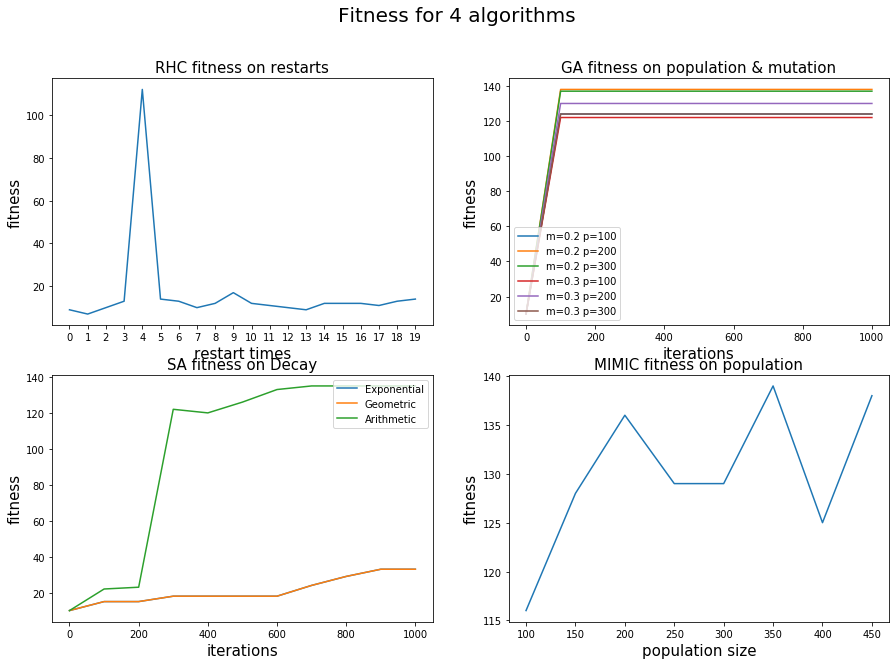

In [8]:
#pic for 4 parameters
iter = range(0,1050,100)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.set_figheight(10)
fig.set_figwidth(15)
fig.suptitle('Fitness for 4 algorithms',fontsize=20)

ax1.plot(fit_array3_rhc)
ax1.set_xlabel("restart times",fontsize=15)
ax1.set_ylabel("fitness",fontsize=15)
ax1.set_title("RHC fitness on restarts",fontsize = 15)
ax1.set_xticks(range(0,20))

fit_ga_df = np.asarray(fit_ga_df)
ax2.plot(iter,fit_ga_df.T)
ax2.set_xlabel("iterations",fontsize=15)
ax2.set_ylabel("fitness",fontsize=15)
ax2.set_title("GA fitness on population & mutation",fontsize = 15)
legend_names = []
mutation = [0.2,0.3]
pop = [100,200,300]
for m in mutation:
    for p in pop:
        l = "m="+str(m)+" p="+str(p)
        legend_names.append(l)
ax2.legend(legend_names,loc='lower left')

iter = range(0,1050,100)
ax3.plot(iter,fit_array_sa_all.T)
ax3.set_xlabel("iterations",fontsize=15)
ax3.set_ylabel("fitness",fontsize=15)
ax3.set_title("SA fitness on Decay",fontsize = 15)
ax3.legend(["Exponential","Geometric","Arithmetic"],loc='upper right')

pop = range(100,500,50)
ax4.plot(pop,fit_array3_mimic)
ax4.set_xlabel("population size",fontsize=15)
ax4.set_ylabel("fitness",fontsize=15)
ax4.set_title("MIMIC fitness on population",fontsize = 15)

fig.savefig("CPP-parameters")

In [54]:
fit_ga_df

array([[ 10., 123., 123., 123., 123., 123., 123., 123., 123., 123., 123.],
       [ 10., 128., 128., 128., 128., 128., 128., 128., 128., 128., 128.],
       [ 10., 125., 125., 125., 125., 125., 125., 125., 125., 125., 125.],
       [ 10., 124., 124., 124., 124., 124., 124., 124., 124., 124., 124.],
       [ 10., 138., 138., 138., 138., 138., 138., 138., 138., 138., 138.],
       [ 10., 137., 137., 137., 137., 137., 137., 137., 137., 137., 137.]])

In [9]:
#change iter
array2 = ["time_array2","fit_array2"]
meth = ["_rhc","_ga","_sa","_mimic"]
schedule = mlrose.ArithDecay()
for m in meth:
    for a in array2:
        globals()[a + m]=[]
        
iter = range(0,1050,100)
max_attempt = 10


for max_iter in iter:
    print(max_iter)
    start = time.time()
    _, best_fitness_rhc, _ = mlrose.random_hill_climb(problem, max_attempts = max_attempt, 
                                                        max_iters = max_iter,restarts=4 )
    end = time.time()
    time_rhc = end - start
    time_array2_rhc.append(time_rhc)
    fit_array2_rhc.append(best_fitness_rhc)
    
    start = time.time()
    _, best_fitness_ga,_ = mlrose.genetic_alg(problem, random_state = 2,max_iters = max_iter,
                                                max_attempts=max_attempt,mutation_prob = 0.2,pop_size = 200)
    end = time.time()
    time_ga = end - start
    time_array2_ga.append(time_ga)
    fit_array2_ga.append(best_fitness_ga)

    
    start = time.time()
    _, best_fitness_sa,_ = mlrose.simulated_annealing(problem, schedule = schedule,
                                                              max_attempts = max_attempt, max_iters = max_iter,
                                                              random_state = 2)
    end = time.time()
    time_sa = end - start
    time_array2_sa.append(time_sa)
    fit_array2_sa.append(best_fitness_sa)

    
    start = time.time()
    _, best_fitness_mimic, _ = mlrose.mimic(problem, pop_size = 350, 
                                              max_attempts = max_attempt, max_iters = max_iter)
    end = time.time()
    time_mimic = end - start
    time_array2_mimic.append(time_mimic)
    fit_array2_mimic.append(best_fitness_mimic)

    
    print(best_fitness_rhc, best_fitness_ga, best_fitness_sa, best_fitness_mimic)

0
11.0 10.0 10.0 6.0
100
9.0 138.0 22.0 131.0
200
9.0 138.0 23.0 130.0
300
11.0 138.0 122.0 149.0
400
11.0 138.0 120.0 150.0
500
9.0 138.0 126.0 134.0
600
10.0 138.0 133.0 134.0
700
11.0 138.0 135.0 138.0
800
9.0 138.0 135.0 138.0
900
9.0 138.0 135.0 138.0
1000
9.0 138.0 135.0 138.0


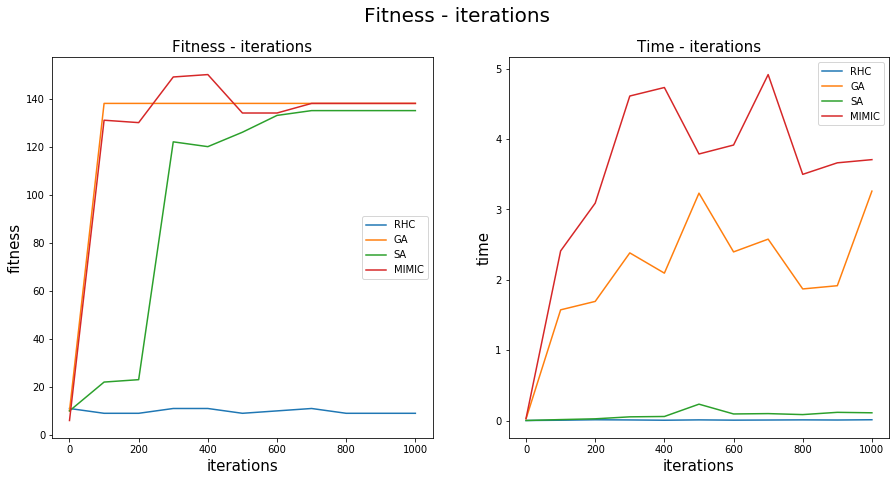

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figheight(7)
fig.set_figwidth(15)
fig.suptitle('Fitness - iterations',fontsize=20)

ax1.plot(iter,fit_array2_rhc)
ax1.plot(iter,fit_array2_ga)
ax1.plot(iter,fit_array2_sa)
ax1.plot(iter,fit_array2_mimic)
ax1.set_xlabel("iterations",fontsize=15)
ax1.set_ylabel("fitness",fontsize=15)
ax1.legend(["RHC","GA","SA","MIMIC"])
ax1.set_title("Fitness - iterations",fontsize=15)

ax2.plot(iter,time_array2_rhc)
ax2.plot(iter,time_array2_ga)
ax2.plot(iter,time_array2_sa)
ax2.plot(iter,time_array2_mimic)
ax2.set_xlabel("iterations",fontsize=15)
ax2.set_ylabel("time",fontsize=15)
ax2.legend(["RHC","GA","SA","MIMIC"])
ax2.set_title("Time - iterations",fontsize=15)

fig.savefig("CPP-iterations")